<a href="https://colab.research.google.com/github/Syauqi366/SyauqiRabbani_MachineLearning/blob/main/praktikum3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount ('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path = "/content/gdrive/MyDrive/praktikumml3"

In [ ]:
import pandas as pd
df = pd.read_csv(path + '/data/stunting_wasting_dataset.csv')
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


In [ ]:
df.describe()

,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg)
count,100000.000000,100000.000000,100000.000000
mean,11.992580,73.132657,9.259256
std,7.199671,11.360846,3.300780
min,0.000000,42.600000,1.000000
25%,6.000000,65.500000,6.900000
50%,12.000000,74.200000,9.200000
75%,18.000000,81.400000,11.700000
max,24.000000,97.600000,17.200000


In [ ]:
df1 = (df[["Berat Badan (kg)","Jenis Kelamin","Umur (bulan)","Tinggi Badan (cm)"]]
       .rename(columns={"Berat Badan (kg)":"Berat_kg",
                        "Jenis Kelamin":"jk",
                        "Umur (bulan)":"Umur_bulan",
                        "Tinggi Badan (cm)":"Tinggi_cm"}))
df1["jk"] = df1["jk"].map({"Perempuan":0,"Laki-laki":1})
df1.head()

,Berat_kg,jk,Umur_bulan,Tinggi_cm
0,13.3,1,19,91.6
1,8.5,1,20,77.7
2,10.3,1,10,79.0
3,8.3,0,2,50.3
4,10.9,0,5,56.4


In [ ]:
corr_matrix = df1.corr()
print(corr_matrix)

            Berat_kg        jk  Umur_bulan  Tinggi_cm
Berat_kg    1.000000  0.045797    0.665389   0.626005
jk          0.045797  1.000000    0.004046   0.073505
Umur_bulan  0.665389  0.004046    1.000000   0.875869
Tinggi_cm   0.626005  0.073505    0.875869   1.000000


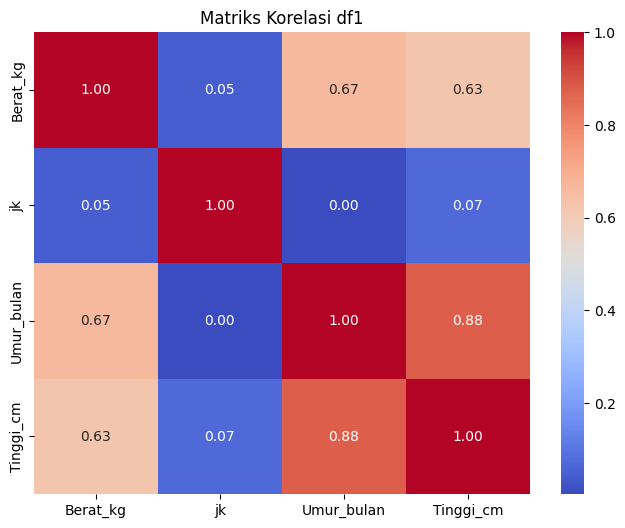

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi df1")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
y = df1["Berat_kg"]
x = df1[["Umur_bulan", "Tinggi_cm"]]
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

print("Jumlah data train :", len(x_train))
print("Jumlah data test :", len(x_test))
x_train.head()

Jumlah data train : 80000
Jumlah data test : 20000


,Umur_bulan,Tinggi_cm
75220,2,51.9
48955,13,74.3
44966,17,86.7
13568,16,76.8
92727,20,78.5


In [ ]:
import statsmodels.api as sm
x_train_const = sm.add_constant(x_train)
x_train_const.head()

,const,Umur_bulan,Tinggi_cm
75220,1.0,2,51.9
48955,1.0,13,74.3
44966,1.0,17,86.7
13568,1.0,16,76.8
92727,1.0,20,78.5
